In [1]:
import cv2
import matplotlib.pyplot as plt
import mediapipe
import numpy as np
import pandas as pd

In [2]:
img = cv2.imread("pexels-cottonbro-8090149-scaled.jpeg")
#img = cv2.imread("deepface/tests/dataset/img1.jpg")

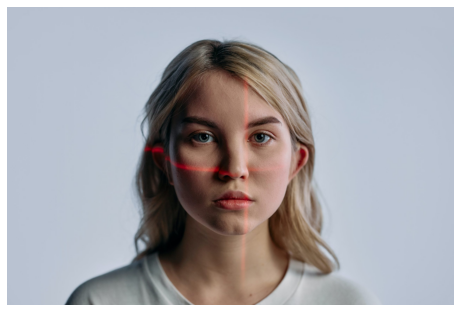

In [3]:
fig = plt.figure(figsize = (8, 8))
plt.axis('off')
plt.imshow(img[:, :, ::-1])
plt.show()

# Facial Landmarks Detector

In [4]:
mp_face_mesh = mediapipe.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [5]:
results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
landmarks = results.multi_face_landmarks[0]

In [7]:
df = pd.DataFrame(list(mp_face_mesh.FACEMESH_FACE_OVAL), columns = ["p1", "p2"])

In [8]:
df.head()

,p1,p2
0,176,149
1,297,332
2,150,136
3,109,10
4,356,454


In [9]:
print(f"Face oval consists of {df.shape[0]} lines")

Face oval consists of 36 lines


## Order landmark points

In [10]:
routes_idx = []

p1 = df.iloc[0]["p1"]
p2 = df.iloc[0]["p2"]

for i in range(0, df.shape[0]):
    
    #print(p1, p2)
    
    obj = df[df["p1"] == p2]
    p1 = obj["p1"].values[0]
    p2 = obj["p2"].values[0]
    
    route_idx = []
    route_idx.append(p1)
    route_idx.append(p2)
    routes_idx.append(route_idx)

In [11]:
routes_idx[0:5]

[[149, 150], [150, 136], [136, 172], [172, 58], [58, 132]]

In [12]:
display_items = 5
for idx, route_idx in enumerate(routes_idx[0:display_items] + routes_idx[-display_items:]):
    print(f"Draw a line between {route_idx[0]}th landmark point to {route_idx[1]}th landmark point")
    if idx == display_items - 1:
        print("\n...\n")

Draw a line between 149th landmark point to 150th landmark point
Draw a line between 150th landmark point to 136th landmark point
Draw a line between 136th landmark point to 172th landmark point
Draw a line between 172th landmark point to 58th landmark point
Draw a line between 58th landmark point to 132th landmark point

...

Draw a line between 400th landmark point to 377th landmark point
Draw a line between 377th landmark point to 152th landmark point
Draw a line between 152th landmark point to 148th landmark point
Draw a line between 148th landmark point to 176th landmark point
Draw a line between 176th landmark point to 149th landmark point


## Find the 2D coordinate values of each landmark point

In [13]:
routes = []

#for source_idx, target_idx in mp_face_mesh.FACEMESH_FACE_OVAL:
for source_idx, target_idx in routes_idx:
    
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
        
    relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
    relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))

    #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
    
    routes.append(relative_source)
    routes.append(relative_target)

In [14]:
print(f"There are {len(routes)} landmark points available")

There are 72 landmark points available


In [15]:
routes[0:10]

[(1158, 1249),
 (1117, 1224),
 (1117, 1224),
 (1067, 1185),
 (1067, 1185),
 (1026, 1138),
 (1026, 1138),
 (990, 1072),
 (990, 1072),
 (962, 991)]

## Extract the inner area of facial landmarks

In [16]:
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(bool)
 
out = np.zeros_like(img)
out[mask] = img[mask]

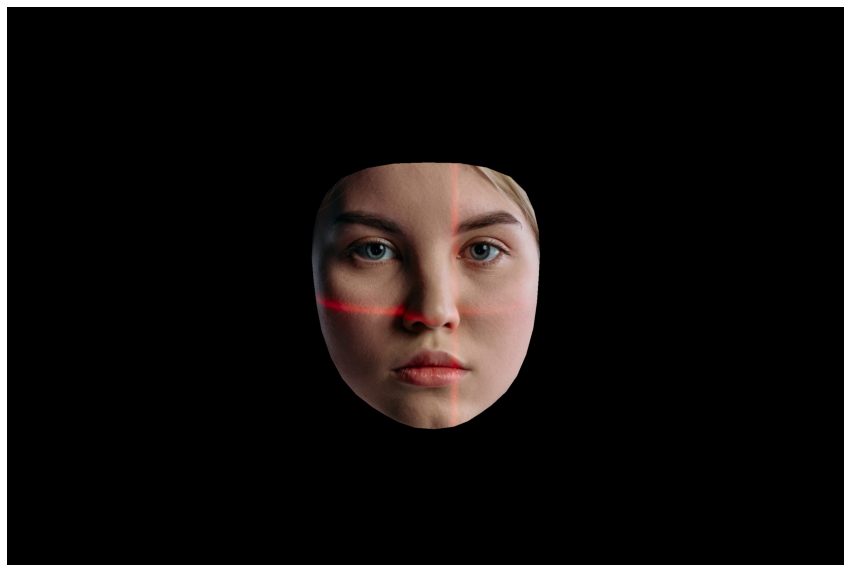

In [17]:
fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(out[:, :, ::-1])